In [46]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px

In [45]:
project_path = '/Volumes/BigData01/adham-till-code'

In [47]:
data = pd.read_pickle(os.path.join(project_path, 'file_path.pkl'))
color = pd.read_pickle(os.path.join(project_path,'color_histogram.pkl'))
df = pd.read_pickle(os.path.join(project_path,'embeddings.pkl'))

In [53]:
data

,file_path,mac_path
image_id,,
0000000_,\images\coco2017_train\train2017\000000147328.jpg,/Volumes/BigData01/images/coco2017_train/train...
0000001_,\images\coco2017_train\train2017\000000414738.jpg,/Volumes/BigData01/images/coco2017_train/train...
0000002_,\images\coco2017_train\train2017\000000281563.jpg,/Volumes/BigData01/images/coco2017_train/train...
0000003_,\images\coco2017_train\train2017\000000063879.jpg,/Volumes/BigData01/images/coco2017_train/train...
0000004_,\images\coco2017_train\train2017\000000531349.jpg,/Volumes/BigData01/images/coco2017_train/train...
...,...,...
0167099_,\images\extra_collection\insects\gary-yost-RN5...,/Volumes/BigData01/images/extra_collection/ins...
0167100_,\images\extra_collection\insects\umesh-soni-51...,/Volumes/BigData01/images/extra_collection/ins...
0167101_,\images\extra_collection\insects\sumit-saharka...,/Volumes/BigData01/images/extra_collection/ins...


In [52]:
# for macos cases
data["mac_path"] = data.file_path.str.replace("\\", "/").str.lstrip("C:")
#data["mac_path"] = data.mac_path.str.replace("E:", "/Volumes/BigData01")
data["mac_path"] = "/Volumes/BigData01" + data.mac_path

/var/folders/mn/7pp33_215lz0rk6s2vrcf9jm0000gn/T/ipykernel_20269/3385197013.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["mac_path"] = data.file_path.str.replace("\\", "/").str.lstrip("C:")


In [51]:
"/Volumes/BigData01" + data.mac_path

image_id
0000000_    /Volumes/BigData01/images/coco2017_train/train...
0000001_    /Volumes/BigData01/images/coco2017_train/train...
0000002_    /Volumes/BigData01/images/coco2017_train/train...
0000003_    /Volumes/BigData01/images/coco2017_train/train...
0000004_    /Volumes/BigData01/images/coco2017_train/train...
                                  ...                        
0167099_    /Volumes/BigData01/images/extra_collection/ins...
0167100_    /Volumes/BigData01/images/extra_collection/ins...
0167101_    /Volumes/BigData01/images/extra_collection/ins...
0167102_    /Volumes/BigData01/images/extra_collection/ins...
0167103_    /Volumes/BigData01/images/extra_collection/ins...
Name: mac_path, Length: 167104, dtype: object

In [39]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
id,,,,,,,,,,,,,,,,,,,,,
0000000_,1.642078,0.000000,0.743942,0.234420,0.952527,0.116200,1.152540,0.809756,0.051322,0.098664,...,1.006713,0.394465,0.862353,0.153266,0.378229,1.600909,0.144255,0.000000,0.456547,0.318457
0000001_,0.237834,0.743523,1.569128,0.230996,2.245258,0.542455,0.055316,0.201157,0.553351,0.213024,...,0.024717,0.111527,0.622623,0.046947,0.000000,0.000000,0.366749,1.473074,1.539011,1.055535
0000002_,0.965902,1.545597,0.072742,0.000000,0.775761,0.031038,0.260257,0.156828,0.068140,0.194489,...,0.654415,0.473969,3.427306,0.000000,0.305507,0.078855,0.722235,1.329341,0.106226,0.865138
0000003_,0.000000,0.143117,0.109090,0.000000,1.323703,0.000000,0.015345,2.345302,0.021467,2.062124,...,0.151082,0.000000,0.079314,0.457159,0.567558,0.006322,0.000000,1.220526,0.156362,1.563209
0000004_,0.000000,1.236826,0.553544,0.548288,0.167068,0.000000,1.144588,0.106205,0.046213,0.000000,...,0.047160,0.129139,0.075926,0.261244,0.000000,3.620260,0.000000,0.424422,2.139266,0.140564


In [89]:
def calculate_similarity(dataframe, img_input):
    """
    This function is used to calculate the euclidean distance of the images
    """
    arr = np.array([])
    for idx in dataframe.index:
        v1 = np.array(dataframe.loc[img_input, :])
        v2 = np.array(dataframe.loc[idx, :])
        arr = np.append(arr, distance.euclidean(v1, v2))
    # sort the idx from highest to lowest value
    sorted_index = np.argsort(arr)
    return sorted_index

In [123]:
def calculate_metric_three(dataframe_color,dataframe_emb,img_input ):
    """
    This function is building the third metric. It´s a mix of the color and embadding metric. 
    """
    arr_color = np.array([])
    for idx in dataframe_color.index:
        v1 = np.array(dataframe_color.loc[img_input, :])
        v2 = np.array(dataframe_color.loc[idx, :])
        # setting up a class weight for colorsimilaity of xx
        arr_color = np.append(arr_color, distance.cityblock(v1, v2)*0.32)
    # sort the idx from highest to lowest value
    #sorted_index_color = np.argsort(arr_color)
    
    
    arr_emb = np.array([])
    for idx in dataframe_emb.index:
        v1 = np.array(dataframe_emb.loc[img_input, :])
        v2 = np.array(dataframe_emb.loc[idx, :])
        # setting up a class weight for colorsimilaity of xx
        arr_emb = np.append(arr_emb, distance.cityblock(v1, v2)*0.68)
    # sort the idx from highest to lowest value
    #sorted_index_emb = np.argsort(arr_emb)
    
    full_arr = arr_color + arr_emb
    sorted_idx = np.argsort(full_arr)
    
    
    return(sorted_idx)
    
    

In [23]:
def get_file_path(paths, sorted_index, n_path=10, pc='windows'):
    """
    This function is used to get the file paths from the given image ids
    """
    file_paths = []
    for i in sorted_index:
        idx = f"{i:07}_"
        if pc == "windows":
            img_path = paths.loc[idx]["file_path"]
        else:
            img_path = paths.loc[idx]["mac_path"]
        file_paths.append(img_path)
    # return only desired n number of paths.
    return file_paths[:n_path] 

In [24]:
def plot_images(file_paths, title):
    """
    This function is used to plot the 9 similar images, that similar to the input image from
    the similarities function
    """
    num_images = len(file_paths)
    num_rows = 2
    num_cols = (num_images + 1) // 2  # Calculate the number of columns based on the number of images

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            try:
                img = mpimg.imread(file_paths[i])
                ax.imshow(img)
                ax.axis('off')
                if i == 0:  # Add a border for the first image
                    ax.set_title("Input Image")
            except IOError:
                print(f"Unable to open image file: {file_paths[i]}")
        else:
            ax.axis('off')  # Hide unused subplot
    
    fig.suptitle(title, fontsize=20)
    
    plt.tight_layout()
    plt.show()

In [135]:
# compare image from one id
# ex. 129345
number = 129999
image_id = f"{number:07}_"

#calculate the similarities, and sort by high to low
color_similarity = calculate_similarity(color, image_id)
embeddings_similarity = calculate_similarity(df, image_id)
metric_three = calculate_metric_three(color, df, image_id)

In [136]:
# get the index of top 10 similar images
top_color = get_file_path(data, color_similarity, n_path=10, pc="mac")
top_embeddings = get_file_path(data, embeddings_similarity, n_path=10, pc="mac")
top_metric_three = get_file_path(data, metric_three, n_path=10, pc="mac")

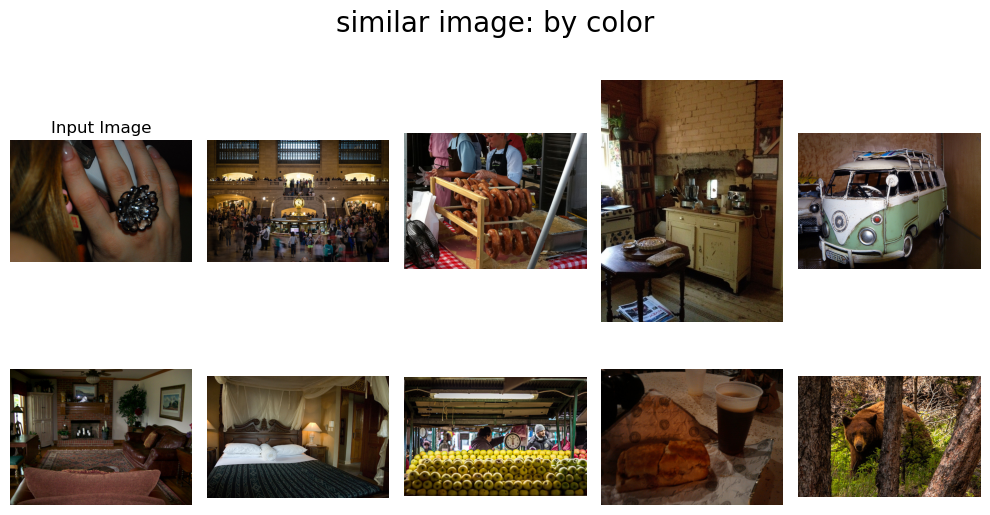

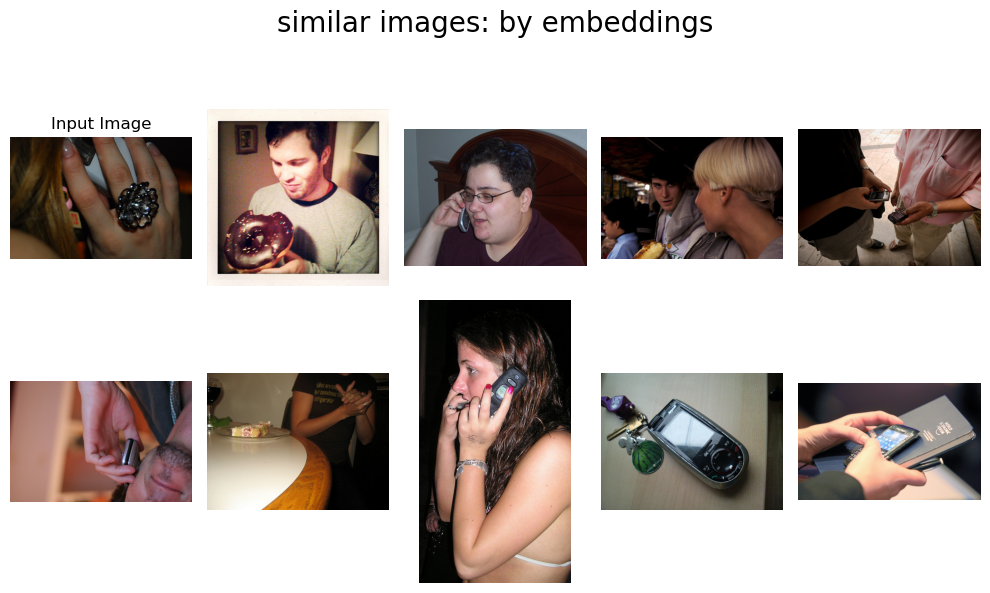

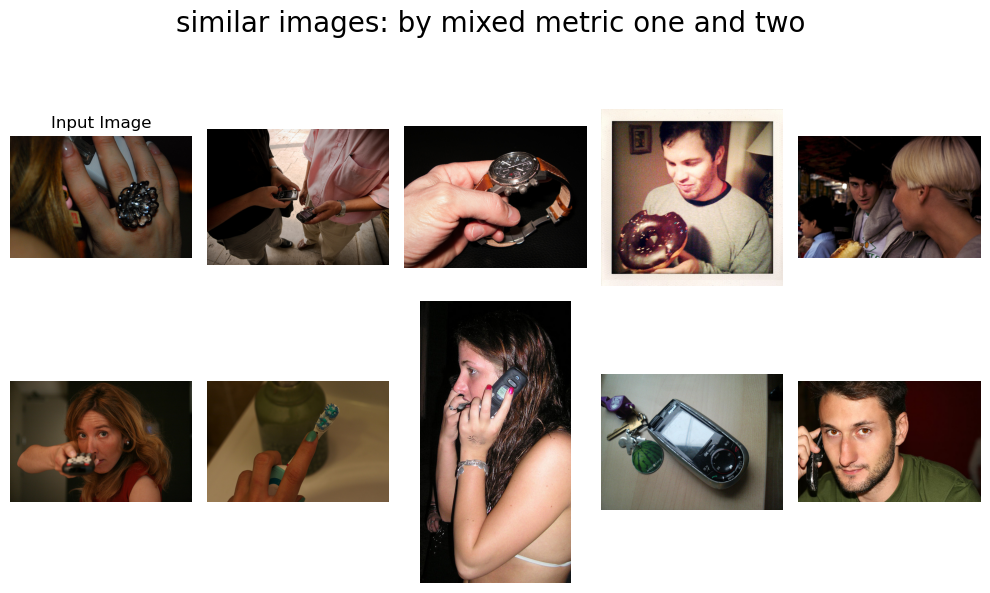

In [137]:
# plot the images
plot_images(top_color, "similar image: by color")
plot_images(top_embeddings, "similar images: by embeddings")
plot_images(top_metric_three, "similar images: by mixed metric one and two ")